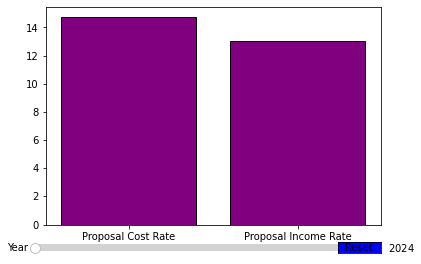

In [17]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button

fig, ax = plt.subplots()

proposal_cost_rate = [14.71, 15.00, 15.19, 15.35, 15.40, 15.45, 15.50, 15.54, 15.57, 15.71,
                      15.81, 15.90, 15.98, 16.05, 16.11, 16.16, 16.21, 16.24, 16.27, 16.28,
                      16.29, 16.30, 16.31, 16.32, 16.34, 16.36, 16.38, 16.42, 16.45, 16.50,
                      16.55, 16.61, 16.67, 16.74, 16.81, 16.88, 16.95, 17.01, 17.06, 17.12,
                      17.17, 17.23, 17.28, 17.34, 17.39, 17.46, 17.51, 17.57, 17.62, 17.68,
                      17.73, 17.77, 17.80, 17.82, 17.83, 17.83, 17.82, 17.81, 17.79, 17.76,
                      17.72, 17.67, 17.62, 17.56, 17.51, 17.45, 17.40, 17.37, 17.34, 17.33,
                      17.32, 17.33, 17.35, 17.37, 17.40]

proposal_income_rate  = [
13.03, 12.89, 13.07, 13.11, 13.13, 13.16, 13.18, 13.20, 13.22, 13.26,
    13.27, 13.28, 13.29, 13.30, 13.31, 13.31, 13.32, 13.32, 13.33, 13.33,
    13.33, 13.33, 13.34, 13.34, 13.34, 13.34, 13.35, 13.35, 13.35, 13.36,
    13.36, 13.36, 13.37, 13.38, 13.38, 13.39, 13.39, 13.40, 13.40, 13.41,
    13.41, 13.42, 13.42, 13.43, 13.43, 13.44, 13.44, 13.44, 13.45, 13.45,
    13.46, 13.46, 13.47, 13.47, 13.47, 13.47, 13.47, 13.47, 13.47, 13.47,
    13.47, 13.47, 13.46, 13.46, 13.46, 13.45, 13.45, 13.45, 13.44, 13.44,
    13.44, 13.44, 13.44, 13.44, 13.45, 13.45
]

axyear = plt.axes([0.1, 0.02, 0.8, 0.05])
year_slider = Slider(axyear, 'Year', 2024, 2099, valinit=2024, valstep=1)

x_axis = ["Proposal Cost Rate", "Proposal Income Rate"]
y_axis = [proposal_cost_rate[0], proposal_income_rate[0]]

bars = ax.bar(x_axis, y_axis, color='purple', edgecolor="black")

def update(val):
    year = int(year_slider.val)
    index = year - 2024  
    new_y_axis = [proposal_cost_rate[index], proposal_income_rate[index]]
    
    for bar, new_height in zip(bars, new_y_axis):
        bar.set_height(new_height)
    
    fig.canvas.draw_idle() 

year_slider.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color='blue', hovercolor='skyblue')

def reset_slider(event):
    year_slider.reset()

button.on_clicked(reset_slider)

plt.show()


0     2024.0
1     2025.0
2     2026.0
3     2027.0
4     2028.0
       ...  
71    2095.0
72    2096.0
73    2097.0
74    2098.0
75    2099.0
Name: Year, Length: 76, dtype: float64


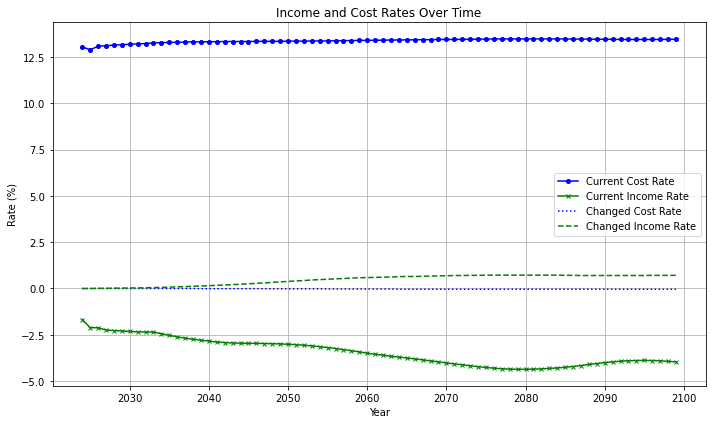

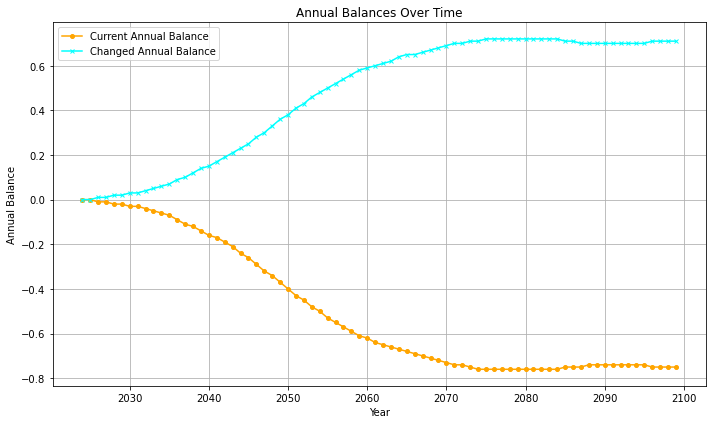

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df_C11 = pd.read_excel("Age_C11.xlsx")
df_C11.set_index("Year", inplace = True) #Policy Proposal C1.1


df_C11 [df_C11 .columns[0]] = pd.to_numeric(df_C11[df_C11.columns[0]], errors='coerce')  
cost_rate_current = df_C11[df_C11.columns[1]]  # Current cost rate (second column)
income_rate_current = df_C11[df_C11.columns[2]]  # Current income rate (third column)
annual_balance_current = df_C11[df_C11.columns[3]]  # Current annual balance (fourth column)
cost_rate_changed = df_C11[df_C11.columns[4]]  # Changed cost rate (fifth column)
income_rate_changed = df_C11[df_C11.columns[5]]  # Changed income rate (sixth column)
annual_balance_changed = df_C11["Change_annual_balance"]  # Changed annual balance (seventh column)

# Step 3: Create the first plot for cost rate and income rate
plt.figure(figsize=(10, 6))
plt.plot(years, cost_rate_current, label='Current Cost Rate', color='blue', marker='o', markersize=4)
plt.plot(years, income_rate_current, label='Current Income Rate', color='green', marker='x', markersize=4)
plt.plot(years, cost_rate_changed, label='Changed Cost Rate', color='blue', linestyle='dotted', markersize=4)
plt.plot(years, income_rate_changed, label='Changed Income Rate', color='green', linestyle='--', markersize=4)

# Add labels and title
plt.title('Income and Cost Rates Over Time')
plt.xlabel('Year')
plt.ylabel('Rate (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 4: Create the second plot for annual balances
plt.figure(figsize=(10, 6))
plt.plot(years, annual_balance_current, label='Current Annual Balance', color='orange', marker='o', markersize=4)
plt.plot(years, annual_balance_changed, label='Changed Annual Balance', color='cyan', marker='x', markersize=4)

# Add labels and title
plt.title('Annual Balances Over Time')
plt.xlabel('Year')
plt.ylabel('Annual Balance')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()